In [1]:
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
# Load the Iris dataset
iris = load_iris()

In [5]:
class MulticlassSVM():
    def __init__(self, learning_rate = 0.001, lambda_param = 0.01, n_iters = 1000):
        # initialize parameters for gradient descent and regularization
        # prepare storage for one-vs-rest classifiers
        self.learning_rate = learning_rate
        self.lambda_param = lambda_param
        self.n_iters = n_iters
        self.weight = None
        self.bias = None
        self.classes = None
    
    def fit(self, X, y):
        # training loop for each class (one-vs-rest)
        # update weights and bias using hinge loss + regularization
        x_samples , x_features = X.shape
        self.classes = np.unique(y)
        num_of_classes = len(self.classes)
    
        self.weight = np.zeros((num_of_classes, x_features))
        self.bias = np.zeros(num_of_classes)

        for index, cls in enumerate(self.classes):
            weight = np.zeros(x_features)
            bias = 0
            y_loop = np.where(y == cls, 1, -1)

            for _ in range (self.n_iters):
                for i, x_i in enumerate(X):
                    condition = y_loop[i] * (np.dot(x_i, weight) + bias) >= 1
                    if condition:
                        dWeight = self.lambda_param * weight
                        dBias = 0
                    else:
                        dWeight = self.lambda_param * weight - y_loop[i] * x_i
                        dBias = -y_loop[i]
                    
                    weight = weight - self.learning_rate * dWeight
                    bias = bias - self.learning_rate * dBias
            
            self.weight[index,:] = weight
            self.bias[index] = bias

    def predict(self, X):
        # compute decision scores for each class
        # assign each sample to the class with highest score
        classifier_scores = np.dot(X, self.weight.T) + self.bias
        y_predicted = np.argmax(classifier_scores, axis = 1)
        return y_predicted

In [11]:
X = iris.data
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

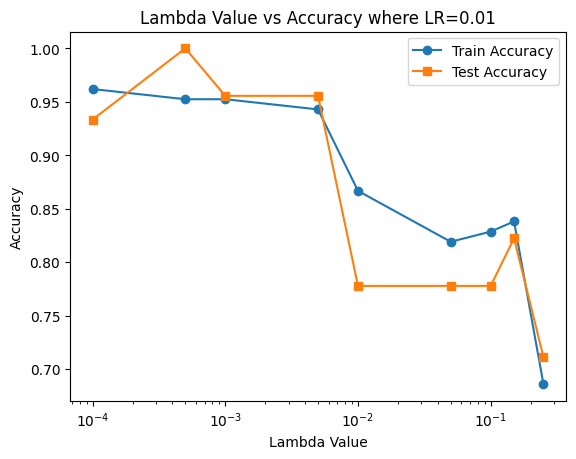

   Lambda Value  Train Accuracy  Test Accuracy
0        0.0001        0.961905       0.933333
1        0.0005        0.952381       1.000000
2        0.0010        0.952381       0.955556
3        0.0050        0.942857       0.955556
4        0.0100        0.866667       0.777778
5        0.0500        0.819048       0.777778
6        0.1000        0.828571       0.777778
7        0.1500        0.838095       0.822222
8        0.2500        0.685714       0.711111


In [13]:
lambda_values = [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.15, 0.25]
accuracies_lambda = {}

for lamb in lambda_values:
    svm = MulticlassSVM(learning_rate=0.01, lambda_param=lamb, n_iters=1000)
    svm.fit(X_train, y_train)
    y_pred_train = svm.predict(X_train)
    y_pred = svm.predict(X_test)
    acc_train = accuracy_score(y_pred_train, y_train)
    acc_test = accuracy_score(y_test, y_pred)
    accuracies_lambda[lamb] = (acc_train, acc_test)

train_accuracies = [v[0] for v in accuracies_lambda.values()]
test_accuracies = [v[1] for v in accuracies_lambda.values()]

plt.plot(lambda_values, train_accuracies, marker='o', label="Train Accuracy")
plt.plot(lambda_values, test_accuracies, marker='s', label="Test Accuracy")
plt.xlabel("Lambda Value")
plt.xscale("log")  
plt.ylabel("Accuracy")
plt.title("Lambda Value vs Accuracy where LR=0.01")
plt.legend()
plt.show()

new_df = pd.DataFrame({
    'Lambda Value': lambda_values,
    'Train Accuracy': train_accuracies,
    'Test Accuracy': test_accuracies,
})
print(new_df)

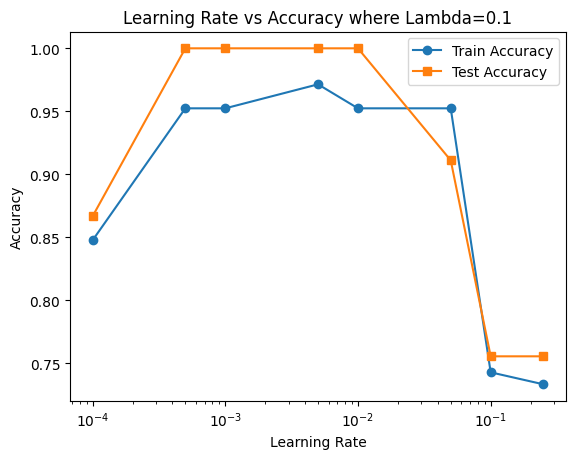

   Learning Rate  Train Accuracy  Test Accuracy
0         0.0001        0.847619       0.866667
1         0.0005        0.952381       1.000000
2         0.0010        0.952381       1.000000
3         0.0050        0.971429       1.000000
4         0.0100        0.952381       1.000000
5         0.0500        0.952381       0.911111
6         0.1000        0.742857       0.755556
7         0.2500        0.733333       0.755556

            sepal length (cm)  sepal width (cm)  petal length (cm)  \
setosa              -0.241699          0.952727          -1.960376   
versicolor          -1.397766        -16.870525           4.301046   
virginica           -5.337641        -12.062694          20.671330   

            petal width (cm)  
setosa             -1.040373  
versicolor        -16.020752  
virginica          15.249990  
Bias value:  [  3.25  47.5  -60.75]


In [15]:
learning_rates = [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.25]
accuracies_lr = {}

for lr in learning_rates:
    svm = MulticlassSVM(learning_rate=lr, lambda_param=0.0005, n_iters=1000)
    svm.fit(X_train, y_train)
    y_pred_train = svm.predict(X_train)
    y_pred = svm.predict(X_test)
    acc_train = accuracy_score(y_pred_train, y_train)
    acc_test = accuracy_score(y_test, y_pred)
    accuracies_lr[lr] = (acc_train, acc_test)

train_accuracies = [v[0] for v in accuracies_lr.values()]
test_accuracies = [v[1] for v in accuracies_lr.values()]

plt.plot(learning_rates, train_accuracies, marker='o', label="Train Accuracy")
plt.plot(learning_rates, test_accuracies, marker='s', label="Test Accuracy")
plt.xlabel("Learning Rate")
plt.xscale("log")  
plt.ylabel("Accuracy")
plt.title("Learning Rate vs Accuracy where Lambda=0.1")
plt.legend()
plt.show()

new_df = pd.DataFrame({
    'Learning Rate': learning_rates,
    'Train Accuracy': train_accuracies,
    'Test Accuracy': test_accuracies,
})

print(new_df)
print()
feature_names = iris.feature_names
class_names = iris.target_names
df_W = pd.DataFrame(svm.weight, index=class_names, columns=feature_names)
print(df_W)
print("Bias value: ", svm.bias)

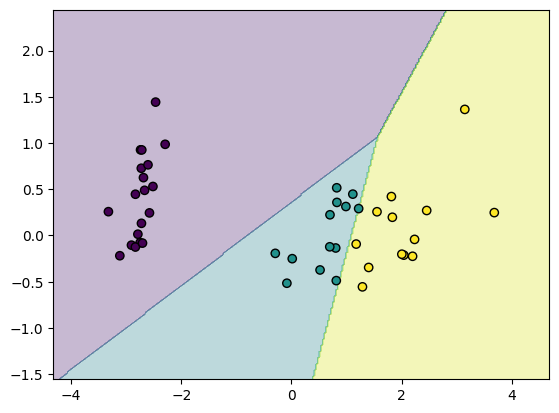

Test Accuracy (2D): 1.00


In [21]:
from sklearn.decomposition import PCA

def plot_decision_boundary(X, y, model):
    x_min, x_max = X[:,0].min() - 1, X[:,0].max() + 1
    y_min, y_max = X[:,1].min() - 1, X[:,1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                         np.linspace(y_min, y_max, 300))
    grid = np.c_[xx.ravel(), yy.ravel()]
    
    preds = model.predict(grid).reshape(xx.shape)

    plt.contourf(xx, yy, preds, alpha=0.3)
    plt.scatter(X[:,0], X[:,1], c=y, edgecolors='k')
    plt.show()
    
# reduce to 2 dimensions for visualization
pca = PCA(n_components=2)
X_train_2d = pca.fit_transform(X_train)
X_test_2d = pca.transform(X_test)

svm = MulticlassSVM(learning_rate=0.005, lambda_param=0.0005, n_iters=1000)
svm.fit(X_train_2d, y_train)
plot_decision_boundary(X_test_2d, y_test, svm)

svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
acc = np.mean(y_pred == y_test)
print(f"Test Accuracy (2D): {acc:.2f}")